In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EGDI

In [46]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [47]:
egdi = egdi.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [48]:
egov = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Government Index',
    var_name='Metric',
    value_name='Índice de Democracia Eleitoral'
)

In [49]:
egov = egov.iloc[:, [0, 2]]

In [50]:
epart = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Participation Index',
    var_name='Metrica',
    value_name='Índice de Democracia Eleitoral'
)

In [51]:
epart = epart.iloc[:, [0, 2]]

In [52]:
countries = egdi['Country Name'].tolist()

PIB PER CAPITA PPC

In [53]:
pib = pd.read_csv('wb_gdp_percapita_ppc_updated.csv')

In [54]:
pib = pib.melt(
    id_vars='Country Name',
    value_vars='2024',
    var_name='Ano',
    value_name='PIB'
)

In [55]:
pib = pib[pib['Country Name'].isin(countries)]

In [56]:
pib = pib.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [57]:
pib = pib.fillna(0.0)

In [58]:
pib = pib.iloc[:, [0, 2]]

DIAGRAMA DE DISPERSÃO: EGDI X ELECTORAL DEMOCRACY INDEX

In [59]:
df_egdi_ide = egov.copy()

In [60]:
df_egdi_ide['Produto Interno Bruto'] = pib['PIB']

In [61]:
df_egdi_ide = df_egdi_ide.iloc[:, [1, 2]]

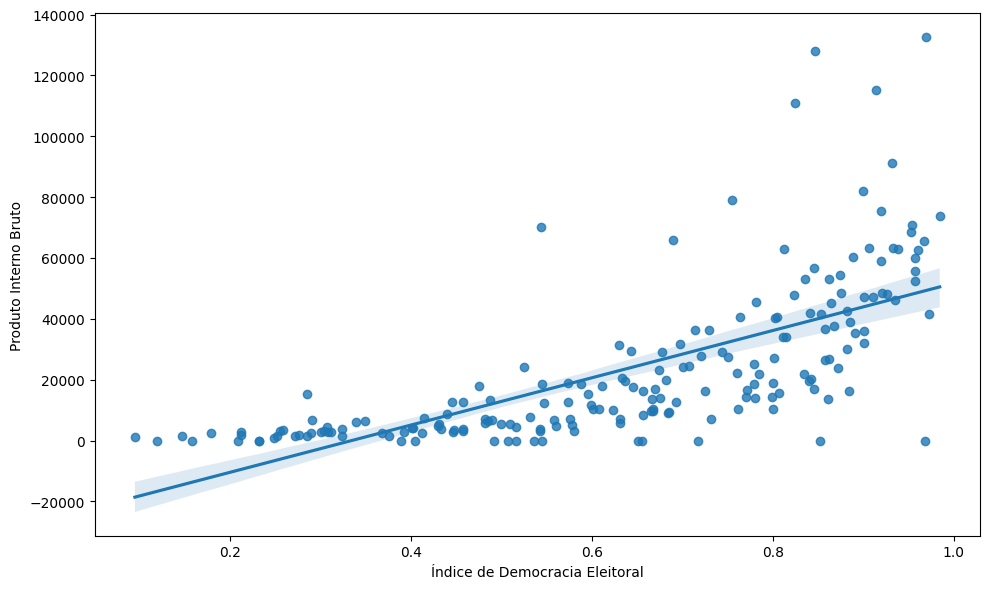

In [62]:
plt.figure(figsize=(10, 6))

sns.regplot(data=df_egdi_ide, x='Índice de Democracia Eleitoral', y='Produto Interno Bruto')

plt.tight_layout()
plt.show()

DIAGRAMA DE DISPERSÃO: EGDI X ELECTORAL DEMOCRACY INDEX

In [63]:
df_epart_ide = epart.copy()

In [64]:
df_epart_ide['Produto Interno Bruto'] = pib['PIB']

In [65]:
df_epart_ide = df_epart_ide.iloc[:, [1, 2]]

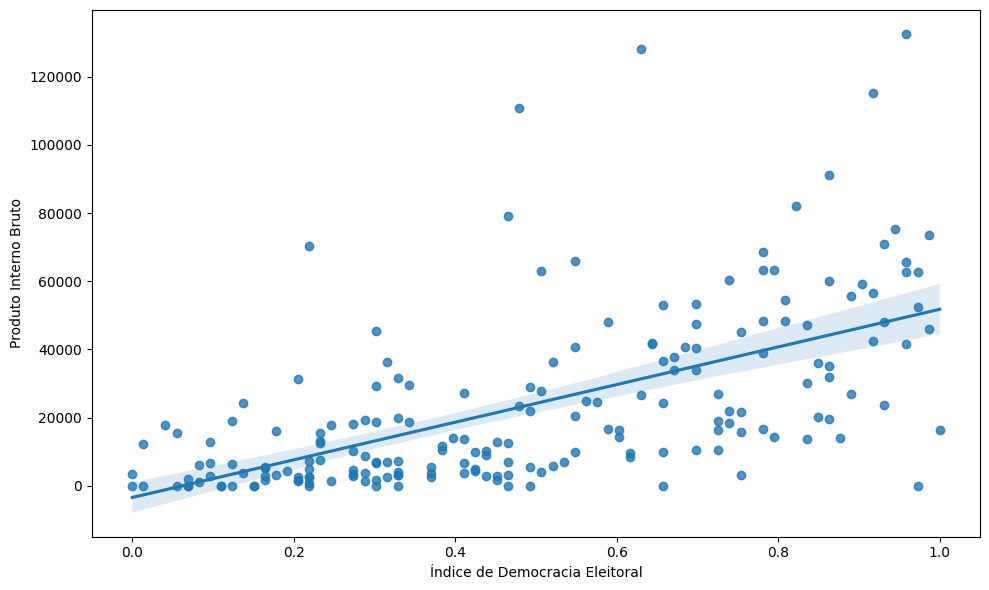

In [66]:
plt.figure(figsize=(10, 6))

sns.regplot(data=df_epart_ide, x='Índice de Democracia Eleitoral', y='Produto Interno Bruto')

plt.tight_layout()
plt.show()

ÍNDICE DE DEMOCRACIA ELEITORAL

ide = pd.read_csv('electoral-democracy-index.csv')

ide = ide.iloc[:, [0, 2]]

ide = ide[ide['Year'] == 2024].reset_index(drop=True)